In [17]:
import matplotlib.pyplot as plt
import numpy as np

## 1) 
    - 4 salınımlı bir sinüs dalgası oluşturun.
        Her periyotta L örnek olsun. (L*4 elemanlı bir vektör)
    - Bu sinyalin FFT ' sini alın ve genliğini çizdirin.

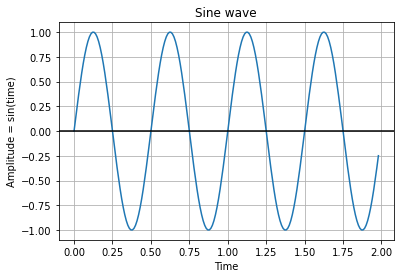

In [62]:
def sine_wave(f, overSampRate,phase,nCyl):
	"""
	Generate sine wave signal with the following parameters
	Parameters:
		f : frequency of sine wave in Hertz
		overSampRate : oversampling rate (integer)
		phase : desired phase shift in radians
		nCyl : number of cycles of sine wave to generate
	Returns:
		(t,g) : time base (t) and the signal g(t) as tuple
	Example:
		f=10; overSampRate=30;
		phase = 1/3*np.pi;nCyl = 5;
		(t,g) = sine_wave(f,overSampRate,phase,nCyl)
	"""
	fs = overSampRate*f # sampling frequency
	t = np.arange(0,nCyl*1/f-1/fs,1/fs) # time base
	g = np.sin(2*np.pi*f*t+phase) # replace with cos if a cosine wave is desired
	return (t,g) # return time base and signal g(t) as tuple

f = 10 # frequency of sine wave in Hertz
nCyl=4 # number of cycles of sine wave to generate
phase=0 # desired phase shift in radians
overSampRate = 50 # oversampling rate (integer)

fs = overSampRate*f

time, signal = sine_wave(f=2, overSampRate=overSampRate, phase=0, nCyl=4)

#plt a sine wave using time and amplitude obtained for the sine wave
plt.plot(time, signal)

# Give a title for the sine wave plt
plt.title('Sine wave')

# Give x axis label for the sine wave plt
plt.xlabel('Time')

# Give y axis label for the sine wave plt
plt.ylabel('Amplitude = sin(time)')

plt.grid(True, which='both') 
plt.axhline(y=0, color='k')
# Display the sine wave
plt.show()

/tmp/ipykernel_7344/230682697.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


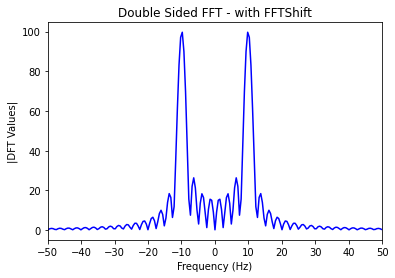

In [63]:
from scipy.fftpack import fft,fftshift


NFFT=1024     
X=fftshift(fft(signal,NFFT))

fig4, ax = plt.subplots(nrows=1, ncols=1) #create figure handle

fVals=np.arange(start = -NFFT/2,stop = NFFT/2)*fs/NFFT
ax.plot(fVals,np.abs(X),'b')
ax.set_title('Double Sided FFT - with FFTShift')
ax.set_xlabel('Frequency (Hz)')         
ax.set_ylabel('|DFT Values|')
ax.set_xlim(-50,50)
ax.set_xticks(np.arange(-50, 50+10,10))
fig4.show()

## 2) 
    - Aynı işlemleri kare dalga için tekrarlayın. 

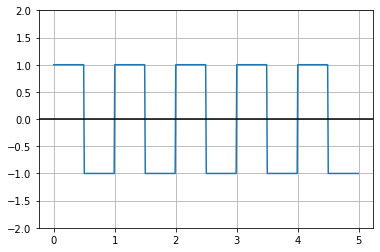

In [78]:
from scipy import signal as sgn
time = np.linspace(0, 5, 500, endpoint=False)
f = 1
signal = sgn.square(2*np.pi*f*time)

plt.ylim(-2,2); 
plt.plot(time, signal); 
plt.grid(True, which='both') 
plt.axhline(y=0, color='k')

plt.show()

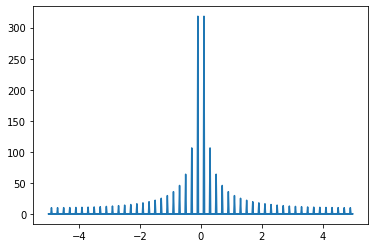

In [82]:
amp = np.absolute(np.fft.fft(signal))
ff1t5 = np.fft.fftfreq(500, d=0.1)
plt.plot(ff1t5, amp); plt.show()

## Bonus:
    - 1 ve 2 deki sinalleri farklı frekanslarında ödevi tekrarlayın.